<a href="https://colab.research.google.com/github/nazarcoder123/Yes_Bank-Stock-Prediction-Using-XGBOOST/blob/main/yesbankstockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to provide accurate Yes Bank stock price predictions, assisting traders and investors in making data-driven decisions. The models are evaluated rigorously, and the results are shared in the repository.

# **GitHub Link -**

GitHub Link here.

https://github.com/nazarcoder123/Yes_Bank-Stock-Prediction-Using-XGBOOST/blob/main/Machine%20Learning%20Yes%20Bank%20Stock%20Price%20Prediction.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

I this model we are build a model that can predict the stock price of yes bank you open high low close so thta accurately stock price cab be predicted using XGBoost.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

### Dataset Loading

In [32]:
# Load Dataset
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset First View

In [33]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [34]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [35]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [36]:
# Dataset Duplicate Value Count
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

#### Missing Values/Null Values

In [37]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [38]:
# Visualizing the missing values
df.isnull().sum().sum()    ## There is no missing values in the data

0

### What did you know about your dataset?

Answer Here:
   my data consist of open high low close and date column
   from my data i need to predict the closing price...

## ***2. Understanding Your Variables***

In [39]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [40]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Answer Here: There is no missing values in the data
as we can see on the above we have divided the data into mean , std , min , 25% , 50% , 75% , max.

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.
df["Date"].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

In [42]:
df["Open"].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

In [43]:
df["Close"].unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

## 3. ***Data Wrangling***

### Data Wrangling Code

<Axes: >

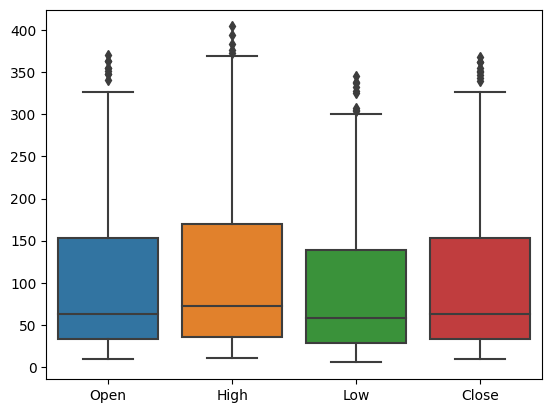

In [44]:
# Write your code to make your dataset analysis ready.
sns.boxplot(df)   # This are not outlier but your system is considering it as outliers

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-45-189c5dd547f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Open"])


<Axes: xlabel='Open', ylabel='Density'>

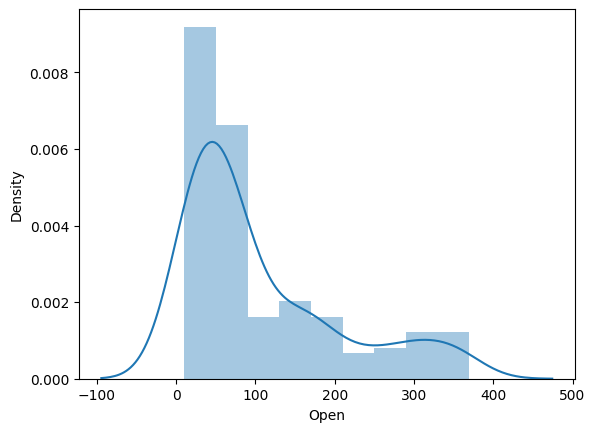

In [45]:
# Chart - 1 visualization code
sns.distplot(df["Open"])

##### 1. Why did you pick the specific chart?

Answer Here.
From the above chart we can see clearly that the data is slightly right skewed.This chart is help us to know what type of distribution of the data is.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The data is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes we need to change by applying the log or power transformation.

#### Chart - 2

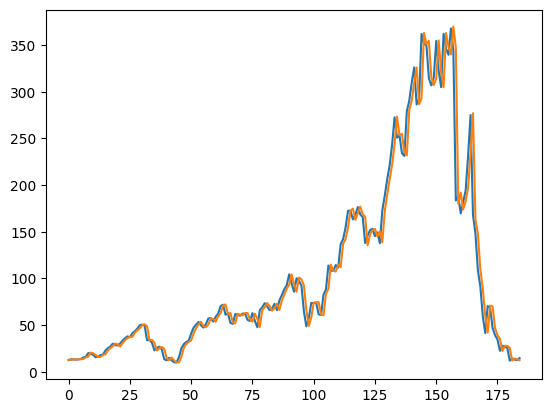

In [46]:
# Chart - 2 visualization code
plt.plot(df["Close"])
plt.plot(df["Open"])

##### 1. Why did you pick the specific chart?

Answer Here.
To know where is the opening taking place and where is the closing taking place.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
From the above chart we can see clearly that  where is no such big difference between the closing and opening

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes it help in better understanding of the chart.

#### Chart - 3

<Axes: >

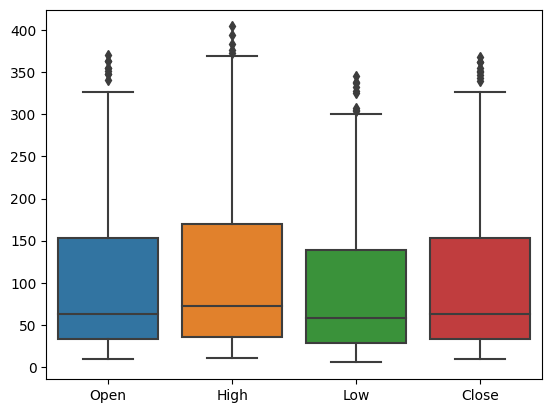

In [47]:
# Chart - 3 visualization code
sns.boxplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.
To know the outlier in the data

##### 2. What is/are the insight(s) found from the chart?

Answer Here
it is showing outlier in the data but really there is no outliers in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
It help in clear understanding of the data

#### Chart - 4

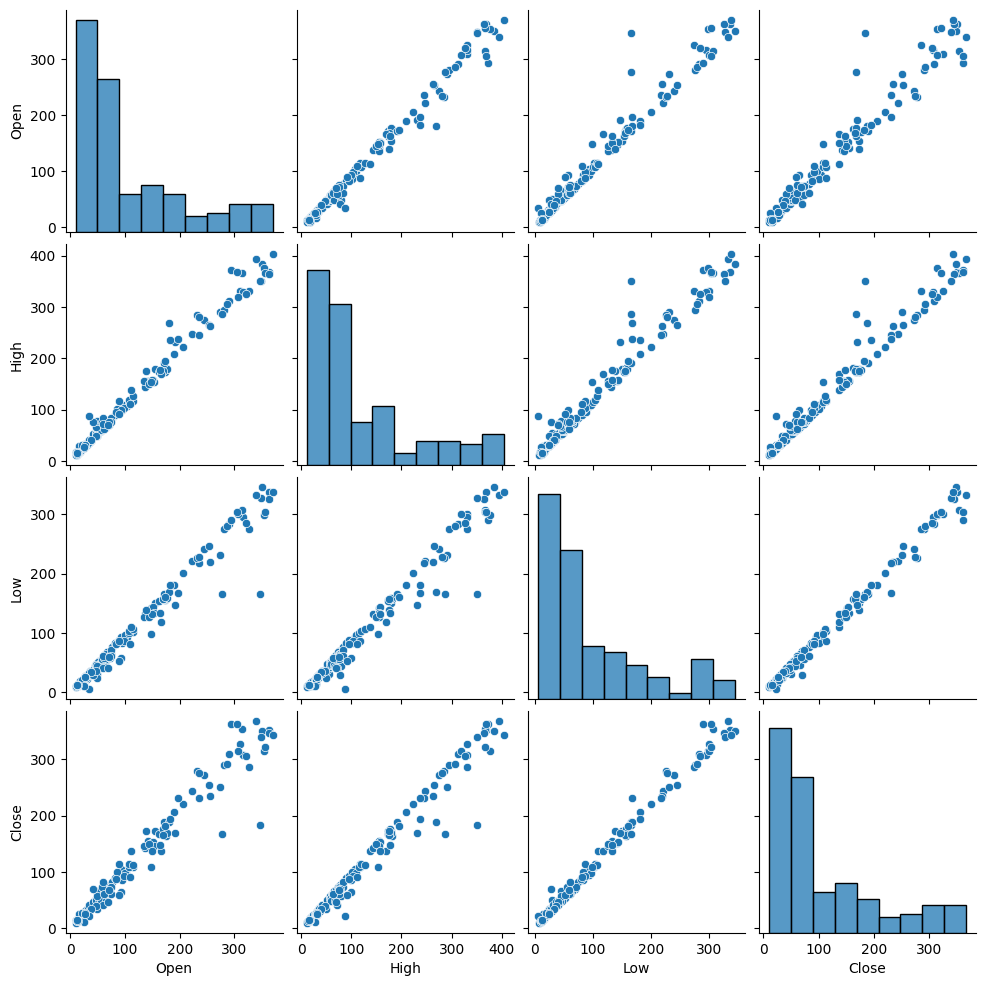

In [48]:
# Chart - 4 visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

*Answer* Here:
To perform the end to end EDA in best way which include all columns performs and relationship with different columns.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
from the above chart we can see clearly that how te relationship exist between the data of different attributes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Yes i help in better understanding of the data.

#### Chart - 5

In [49]:
!pip install pandas-profiling

In [50]:
# Chart - 5 visualization code
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### 1. Why did you pick the specific chart?

Answer Here.
It provie you end to end details of the data

##### 2. What is/are the insight(s) found from the chart?

Answer Here
correlation
Heatmap
missing value

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Yes they help in getting clear view of the data

#### Chart - 6

<Axes: >

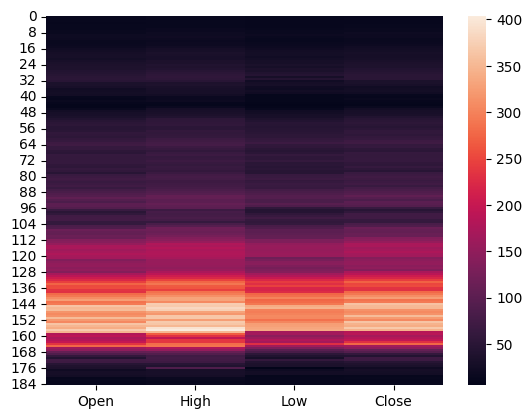

In [51]:
# Chart - 6 visualization code
sns.heatmap(df.drop(columns="Date"))

##### 1. Why did you pick the specific chart?

Answer Here.
To know the correlation

##### 2. What is/are the insight(s) found from the chart?

*Answer* Here:
It help in giving the good understanding of the data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes it provide good visulaization in the data

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Answer Here:

Hypothetical Statement 1:
Statement: "The average closing price of a stock on Fridays is the same as the average closing price on other weekdays."

Now, let's formulate the null and alternative hypotheses:

Null Hypothesis (H0): The average closing price of a stock on Fridays is equal to the average closing price on other weekdays.

Symbolically: μ_Friday = μ_OtherWeekdays
Alternative Hypothesis (H1): The average closing price of a stock on Fridays is not equal to the average closing price on other weekdays.

Symbolically: μ_Friday ≠ μ_OtherWeekdays
In this case, we are testing whether there is a significant difference in the average closing prices between Fridays and other weekdays.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

fridays = df[df['Date'] == 'Friday']['Close']
other_weekdays = df[df['Date'] != 'Friday']['Close']

# Perform a two-sample t-test for means
t_statistic, p_value = stats.ttest_ind(fridays, other_weekdays)

# Print the obtained p-value
print("P-Value:", p_value)

P-Value: nan


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Statement: "The implementation of a new strategy in the market"

## ***6. Feature Engineering & Data Pre-processing***

In [53]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here:
There is no missing value

### 2. Handling Outliers

<Axes: >

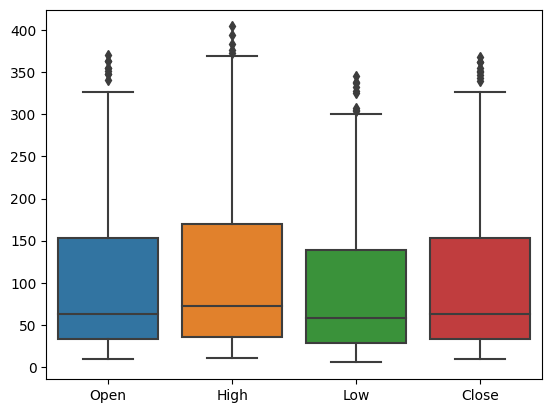

In [54]:
# Handling Outliers & Outlier treatments
sns.boxplot(df.drop(columns="Date"))

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.
There is no need to treat this outliers

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# Manipulate Features to minimize feature correlation and create new features
df.corr()

<ipython-input-55-2b80decdf8f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting
x = df.iloc[:,1:4]
y = df.iloc[:,-1]

##### What all feature selection methods have you used  and why?

Answer Here.
model_Selection

##### Which all features you found important and why?

Answer Here.In the above we had divided the data into x and y

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 6. Data Scaling

In [64]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [65]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
p = PCA()
x_train_p = p.fit_transform(x_train_mms)
x_test_p = p.transform(x_test_mms)

### 8. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## ***7. ML Model Implementation***

In [66]:
# ML Model - 1 Implementation
# Fit the Algorithm
x = XGBRegressor()
x.fit(x_train_mms,y_train)
# Predict on the model
y_pred = x.predict(x_test_mms)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart
r2_score(y_pred,y_test)

0.965894377822361

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Fit the Algorithm

xgb = XGBRegressor()

# Create GridSearchCV object with XGBRegressor and hyperparameter grid
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Predict on the model
grid_search.predict

<bound method BaseSearchCV.predict of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
From the above diagram we can see the best parameters

# **Conclusion**

Write the conclusion here.

From the above we can see your model in performing very accurately prediction are made very close to the target price

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***